In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
commentary_df= pd.read_csv('../data/commentory_matchid.csv')

# Filter the rows where the value in the 'column_name' column meets a condition
filtered_commentary_df = commentary_df[commentary_df['match_id'] == 2]

In [2]:
# Drop the rows with NaN values in the 'column_name' column
filtered_commentary_df = filtered_commentary_df.dropna(subset=['event'])
#capitalize the first letter of each word in a string and replace underscores with spaces. 
filtered_commentary_df['event'] = filtered_commentary_df['event'].str.replace('_', ' ').str.title()

In [3]:
def custom_key(value):
    # Remove any spaces
    value = value.replace(' ', '')
    # Replace any '+' with a '.'
    value = value.replace('+', '.')
    # Try to convert to float
    try:
        return float(value)
    # If it cannot be converted to float, return a large value
    except ValueError:
        return 1000


# Replace "." with "+" in the 'time' column of the dataframe
filtered_commentary_df['time'] = filtered_commentary_df['time'].str.replace('.', '+')

# Sort the values using the custom function as the key
time_values = sorted(filtered_commentary_df['time'].unique(), key=custom_key, reverse=True)

/var/folders/h8/prth26ns4l16zk0r91t9sqlc0000gn/T/ipykernel_4426/1961934324.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_commentary_df['time'] = filtered_commentary_df['time'].str.replace('.', '+')


In [4]:
# create an empty list to store the first string values
player_involved_list = []

# iterate over the rows of the DataFrame and extract the first string value from the "event_player" column
for index, row in filtered_commentary_df.iterrows():

    # get the first element of the list in the DataFrame column
    event_player_list = row["event_player"][2:-2].split(',')

    if row["event"]=="Substitution":

        # extract the first and second string values from the list and remove leading/trailing spaces and single quotes
        first_string = event_player_list[0].strip().strip("'")
        second_string = event_player_list[1].strip().strip("'")

        # concatenate the two strings with "with"
        concatenated_string = "{} with {}".format(first_string, second_string)
        player_involved_list.append(concatenated_string)
    else:
        first_string = event_player_list[0].strip().strip("'")
        player_involved_list.append(first_string)

# add the list of first string values as a new column to the DataFrame
filtered_commentary_df["player_involved"] = player_involved_list

In [5]:
# Filter the commentary dataframe to only include events by 'Young Boys' team
team_events = filtered_commentary_df.loc[filtered_commentary_df['event_team'] == 'Young Boys']

In [6]:
# Group the events by time and event type, and join the players involved into a single string
team_events = team_events.groupby(['time', 'event']).agg({'player_involved': ', '.join}).reset_index()
team_events

,time,event,player_involved
0,45 + 1,Yellow Card,C. Fassnacht
1,46,Substitution,J. Siebatcheu with V. Sierro
2,50,Yellow Card,C. Martins
3,66,Goal,N. Moumi Ngamaleu
4,67,Assist,S. Hefti
5,82,Substitution,F. Rieder with C. Martins
6,83,Substitution,M. Sulejmani with S. Hefti
7,90 + 2,Substitution,"W. Kanga with M. Elia, C. Zesiger with S. ..."
8,90 + 5,Goal,J. Siebatcheu


# Plot to show distribution of events on minute-by-minute basis

In [8]:
import altair as alt

# Define a dictionary of colors for each event
event_colors = {
    'Assist': '#7fbf7b',
    'Goal': '#3690c0',
    'Red Card': '#fb6a4a',
    'Substitution': '#8c6bb1',
    'Own Goal':'#e0f3f8',
    'Yellow Card': '#fcf4a3',
    
    'Penalty Goal':'#91bfdb',
    'Penalty Miss':'#c51b7d',
    'Penalty Save':'#e9a3c9',
}

# Create a chart with time on the y-axis
line1 = (
    alt.Chart(team_events)
    .mark_bar()
    .encode(
        x=alt.X('event', axis=alt.Axis(title='Event')),
        y=alt.Y('time', scale=alt.Scale(domain=time_values), axis=alt.Axis(title='Match time (in minutes)')),
        # color=alt.Color('event', legend=alt.Legend(title='Event', labelFontSize=9, titleFontSize=10, labelLimit=100), scale=alt.Scale(range=list(event_colors.values()))),
        color=alt.Color('event', legend=None,scale=alt.Scale(domain=list(event_colors.keys()), range=list(event_colors.values()))),
        tooltip=[alt.Tooltip('event', title='Event'), alt.Tooltip('player_involved', title='Event Player(s)'), alt.Tooltip('time', title='Match Time')]
    )
    .properties(width=400, height=300, title='Temporal Analysis of Match Events')
    .configure_axis(labelAngle=0)
)
line1

alt.Chart(...)

# Bar Plot 

In [9]:
bar2=alt.Chart(filtered_commentary_df).mark_bar().encode(
    x=alt.X('event', axis=alt.Axis(title='Event')),
    y=alt.Y('count()', axis=alt.Axis(title='Event Count')),
    color=alt.Color('event_team:N', legend=alt.Legend(title='Team', labelFontSize=9, titleFontSize=10, labelLimit=100), scale=alt.Scale(range=['#55a868', '#4c72b0'])),
)
bar2.configure_axisX(labelAngle=45).configure_axis(grid=False, gridColor=None)

alt.Chart(...)

# Word Cloud

In [10]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [11]:
 #Creating the text variable
text = " ".join(cat for cat in commentary_df.comment)

In [12]:
# Generate word cloud
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

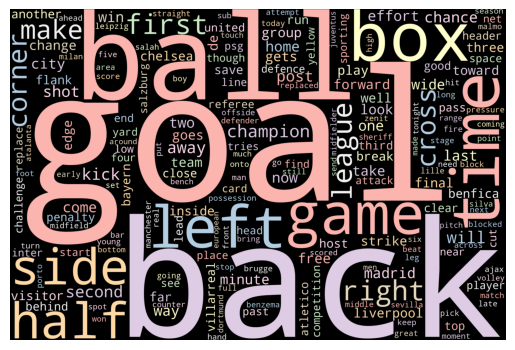

<Figure size 640x480 with 0 Axes>

In [13]:
# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.savefig("word_cloud.png")
